# <u>This is our Mini project for the course "Fundamental Data Concepts" (4DACF) at SUPINFO Lyon :</u>

## <u>Evaluation Project - Data Processing and Visualization :</u>

## <u>Project Objective :</u>
You will design a complete data processing pipeline that includes several key steps: anonymization, transformation, cleaning, and data visualization.


The goal is to leverage multiple technologies to produce a high-quality pipeline that adheres to best practices.

This project must be carried out in groups of up to three students.

## <u>Contexte :</u>
A fictional e-commerce company aims to leverage its customer and transaction data while complying with GDPR regulations.

The company has a dataset containing sensitive information and seeks to obtain:

- [X] An automated pipeline for anonymizing, transforming, and cleaning the data in python.
- [X] A final output optimized for direct use in Power BI.

## <u>BONUS :</u>

- [ ] A set of visualizations in Python to verify.

# <u>Step 1:</u> Pipeline Preparation: Python code for anonymization, cleaning, and transformation

In [88]:
from calendar import month

# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import hashlib

## 1. Exploratory Data Analysis (EDA)

The first step in any data processing pipeline is to understand the data. This involves exploring the data to identify patterns, trends, and potential issues. EDA is a critical step that helps data engineer understand the data and make informed decisions about how to process it.

In [89]:
# Load the dataset : Mini_Projet_Evaluation.csv

dataset_file_path: str = 'data/raw/Mini_Projet_Evaluation.csv'
dataset = pd.read_csv(dataset_file_path)

In [90]:
# Explore the data : Structure of the data, data types, etc.

# Display the first few rows of the dataset

print(f"The dataset head is : \n {dataset.head()}") #to see a quick view of the dataset

The dataset head is : 
                                ClientID       Nom       Prénom  \
0  d34f9cab-5d14-469f-aa80-c0146f3b93c7   Walters  Christopher   
1  d9b374f9-8cec-4ae7-9137-c1d930d0aae0    Weaver        Linda   
2  72855e63-d98e-42e9-a10f-d9e4fac6e82f  Odonnell        Julie   
3  3fcb2796-9692-4fcf-affb-0100d9a74ae1     Clark      Charles   
4  50b21cc8-6f68-45c5-9b75-335ef55b41b2  Martinez        David   

                       Email              Téléphone  \
0       vickie68@hotmail.com     818-767-2351x61325   
1    mackrenee@rodriguez.com      892-112-2129x2425   
2         alexis55@gmail.com  001-505-122-4709x1134   
3  jenniferschmidt@yahoo.com          (101)867-7119   
4     hmiddleton@mendoza.com     (820)441-6404x9218   

                                             Adresse          Ville  \
0                   Unit 4018 Box 5177, DPO AA 69318      Lauratown   
1           19114 Ryan Grove, East Miranda, MO 40887    Herreraview   
2           610 Donna Neck, Lake Pa

In [91]:
# Display the infos of the dataset

print(f"The dataset info is : \n {dataset.info()}") #to see the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientID                 1000 non-null   object 
 1   Nom                      1000 non-null   object 
 2   Prénom                   1000 non-null   object 
 3   Email                    1000 non-null   object 
 4   Téléphone                1000 non-null   object 
 5   Adresse                  1000 non-null   object 
 6   Ville                    1000 non-null   object 
 7   CodePostal               1000 non-null   int64  
 8   Pays                     1000 non-null   object 
 9   DateNaissance            1000 non-null   object 
 10  Âge                      1000 non-null   int64  
 11  Sexe                     1000 non-null   object 
 12  NuméroCarteCrédit        1000 non-null   int64  
 13  TypeCarteCrédit          1000 non-null   object 
 14  DateExpirationCarte      

In [92]:
# Display the shape of the dataset

print(f"This dataset have {dataset.shape[0]} entries and {dataset.shape[1]} columns.") #to see the number of rows and columns in resume, and to see the eventual problems on the dataset

This dataset have 1000 entries and 31 columns.


In [93]:
# Display the descriptive statistics of the dataset

print(f"The dataset describe is : \n {dataset.describe()}") #to see the statistical summary of the dataset, to see the eventual problems on the dataset (outliers, etc.)

The dataset describe is : 
          CodePostal          Âge  NuméroCarteCrédit  SoldeCompte  \
count   1000.000000  1000.000000       1.000000e+03  1000.000000   
mean   50576.295000    55.466000       3.992066e+17  2619.975090   
std    29093.854764    21.021816       1.288862e+18  1443.421728   
min      525.000000    18.000000       6.042067e+10     2.680000   
25%    23961.250000    37.000000       1.800195e+14  1385.430000   
50%    52513.000000    56.000000       3.505393e+15  2734.705000   
75%    76447.000000    73.000000       4.610821e+15  3865.872500   
max    99876.000000    91.000000       4.998787e+18  4994.880000   

       NombreAchats  MontantTotalAchats  FréquenceAchatMensuel  PanierMoyen  \
count   1000.000000          1000.00000            1000.000000  1000.000000   
mean      10.487000          2608.90697               4.879000   238.349630   
std        5.890036          2287.38721               3.260213   150.407597   
min        0.000000             0.00000    

In [94]:
# Display the data types in the dataset

print(f"The dataset data types are : \n {dataset.dtypes}") #to see the data types of the dataset

The dataset data types are : 
 ClientID                    object
Nom                         object
Prénom                      object
Email                       object
Téléphone                   object
Adresse                     object
Ville                       object
CodePostal                   int64
Pays                        object
DateNaissance               object
Âge                          int64
Sexe                        object
NuméroCarteCrédit            int64
TypeCarteCrédit             object
DateExpirationCarte         object
SoldeCompte                float64
TypeClient                  object
NombreAchats                 int64
MontantTotalAchats         float64
DernierAchat                object
ProduitPréféré              object
CatégorieProduitPréféré     object
FréquenceAchatMensuel        int64
PanierMoyen                float64
ScoreFidélité                int64
NombreRemboursements         int64
MontantTotalRemboursé      float64
AvisClient              

## 2. Data Cleaning

Data cleaning is the process of identifying and correcting errors in the data. This step is essential for ensuring the quality of the data and the accuracy of the analysis. Data cleaning involves several key tasks, including:
- [X] Handling missing values
- [X] Removing duplicates
- [X] Correcting errors
- [X] Correcting incoherent values
- [X] Standardizing data
- [X] Handling outliers
- [X] Standardizing data types


In [95]:
# Data Cleaning : Cleaning the dataset

# Handling missing values

missing_values_count = dataset.isnull().sum()
print(f"The missing values count is : \n {missing_values_count}") #to see the number of missing values in each column of the dataset

The missing values count is : 
 ClientID                   0
Nom                        0
Prénom                     0
Email                      0
Téléphone                  0
Adresse                    0
Ville                      0
CodePostal                 0
Pays                       0
DateNaissance              0
Âge                        0
Sexe                       0
NuméroCarteCrédit          0
TypeCarteCrédit            0
DateExpirationCarte        0
SoldeCompte                0
TypeClient                 0
NombreAchats               0
MontantTotalAchats         0
DernierAchat               0
ProduitPréféré             0
CatégorieProduitPréféré    0
FréquenceAchatMensuel      0
PanierMoyen                0
ScoreFidélité              0
NombreRemboursements       0
MontantTotalRemboursé      0
AvisClient                 0
AbonnementNewsletter       0
TypePaiementFavori         0
StatutCompte               0
dtype: int64


In [96]:
# Removing duplicates

duplicates_values_count = dataset.duplicated().sum()
print(f"The number of duplicates in the dataset is : {duplicates_values_count}") #to see the number of duplicates in the dataset

The number of duplicates in the dataset is : 0


In [97]:
# Correcting errors

columns_to_verify = ['Sexe', 'CatégorieProduitPréféré', 'AvisClient', 'AbonnementNewsletter', 'TypePaiementFavori', 'StatutCompte'] #to see the columns that we want to verify

for col in columns_to_verify:
    print(f"\n🔹 {col} : {dataset[col].nunique()} unique values") #to see the number of unique values in each column of the dataset
    print(dataset[col].unique())  # to see the unique values in each column of the dataset


🔹 Sexe : 2 unique values
['M' 'F']

🔹 CatégorieProduitPréféré : 5 unique values
['Sport' 'Électronique' 'Alimentation' 'Mode' 'Maison']

🔹 AvisClient : 5 unique values
['Neutre' 'Satisfait' 'Mécontent' 'Très mécontent' 'Très satisfait']

🔹 AbonnementNewsletter : 2 unique values
[ True False]

🔹 TypePaiementFavori : 4 unique values
['Paypal' 'Carte bancaire' 'Cryptomonnaie' 'Virement']

🔹 StatutCompte : 3 unique values
['Inactif' 'Actif' 'Suspendu']


In [98]:
# Correcting Incoherent values

# Incoherence detection
incoherence_achats = dataset[(dataset['NombreAchats'] == 0) & (dataset['MontantTotalAchats'] > 0)]
incoherence_panier = dataset[(dataset['MontantTotalAchats'] == 0) & (dataset['PanierMoyen'] > 0)]
remboursements_invalides = dataset[dataset['MontantTotalRemboursé'] > dataset['MontantTotalAchats']]

print(f"📌 Nombre de pages incohérentes (NombreAchats = 0 & MontantTotalAchats > 0) : {len(incoherence_achats)}")
print(f"📌 Nombre de pages incohérentes (MontantTotalAchats = 0 & PanierMoyen > 0) : {len(incoherence_panier)}")
print(f"📌 Nombre d'enregistrements où le MontantTotalRemboursé > MontantTotalAchats : {len(remboursements_invalides)}")

# Correcting with mean function
dataset.loc[(dataset['NombreAchats'] == 0) & (dataset['MontantTotalAchats'] > 0), 'NombreAchats'] = dataset['NombreAchats'].median()
dataset.loc[(dataset['PanierMoyen'] == 0) & (dataset['MontantTotalAchats'] > 0), 'MontantTotalAchats'] = dataset['MontantTotalAchats'].median()
dataset.loc[(dataset['MontantTotalAchats'] == 0) & (dataset['PanierMoyen'] > 0), 'PanierMoyen'] = 0  # Logic : if the total amount of purchases is 0, the average basket is 0

# deletion of the incoherent records
df = dataset[dataset['MontantTotalRemboursé'] <= dataset['MontantTotalAchats']]

📌 Nombre de pages incohérentes (NombreAchats = 0 & MontantTotalAchats > 0) : 0
📌 Nombre de pages incohérentes (MontantTotalAchats = 0 & PanierMoyen > 0) : 0
📌 Nombre d'enregistrements où le MontantTotalRemboursé > MontantTotalAchats : 108


In [99]:
# Standardizing data

# Standardizing the float columns
columns_to_round = ['MontantTotalAchats', 'SoldeCompte', 'PanierMoyen', 'MontantTotalRemboursé'] #to see the columns that we want to round
for col in columns_to_round:
    dataset[col] = dataset[col].apply(lambda x: round(x, 2)) #to round the values in each column of the dataset

# Standardizing the countries and cities columns
standardize_name_columns = ['Pays', 'Ville'] #to see the columns that we want to standardize
for col in standardize_name_columns:
    dataset[col] = dataset[col].str.title() #to standardize the values in each column of the dataset

# Standardizing the date columns
standardize_date_columns = ['DateNaissance', 'DernierAchat', 'DateExpirationCarte'] #to see the columns that we want to standardize
def standardise_date(date):
    date = str(date).strip()
    if re.match(r"^\d{4}-\d{2}-\d{2}$", date):
        return date  # yyyy-mm-dd -> yyyy-mm-dd
    elif re.match(r"^\d{2}/\d{2}/\d{4}$", date):
        match = re.match(r"^(\d{2})/(\d{2})/(\d{4})$", date)
        return f"{match.group(3)}-{match.group(1)}-{match.group(2)}"  # mm/dd/yyyy -> yyyy-mm-dd
    elif re.match(r"^(\d{2})/(\d{2})$", date):
        match = re.match(r"^(\d{2})/(\d{2})$", date)
        return f"20{match.group(2)}-{match.group(1)}-01"  # mm/dd -> yyyy-mm-dd
    elif re.match(r"^\d{2}-\d{2}-\d{4}$", date):
        match = re.match(r"^(\d{2})-(\d{2})-(\d{4})$", date)
        return f"{match.group(3)}-{match.group(2)}-{match.group(1)}"  # dd-mm-yyyy -> yyyy-mm-dd
    elif re.match(r"^\d{2}-\d{2}-\d{2}$", date):
        match = re.match(r"^(\d{2})-(\d{2})-(\d{2})$", date)
        return f"20{match.group(3)}-{match.group(2)}-{match.group(1)}"  # dd-mm-yy -> yyyy-mm-dd
    return date

for col in standardize_date_columns:
    dataset[col] = dataset[col].apply(standardise_date) #to standardize the values in each column of the dataset

Outliers numbers find : 0


,ClientID,Nom,Prénom,Email,Téléphone,Adresse,Ville,CodePostal,Pays,DateNaissance,...,CatégorieProduitPréféré,FréquenceAchatMensuel,PanierMoyen,ScoreFidélité,NombreRemboursements,MontantTotalRemboursé,AvisClient,AbonnementNewsletter,TypePaiementFavori,StatutCompte


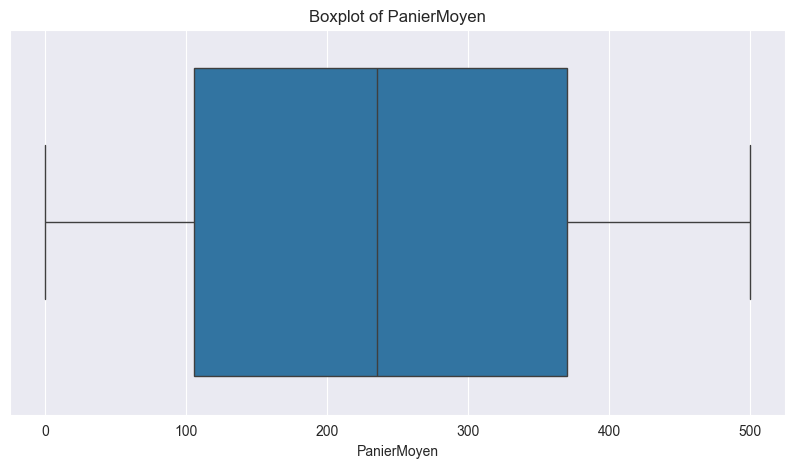

In [100]:
# Handling outliers (Outliers detection)

# Quartiles and IQR for outliers detection
Q1 = dataset['PanierMoyen'].quantile(0.25)
Q3 = dataset['PanierMoyen'].quantile(0.75)
IQR = Q3 - Q1

# bounds definition for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers identification
outliers = dataset[(dataset['PanierMoyen'] < lower_bound) | (dataset['PanierMoyen'] > upper_bound)]
print(f"Outliers numbers find : {len(outliers)}")
display(outliers)

# PanierMoyen graphic representation

# Boxplot of PanierMoyen
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['PanierMoyen'])
plt.title("Boxplot of PanierMoyen")
plt.show()

In [101]:
# Standardizing data types

# Standardizing the data types of the columns
date_standardizing = ['DateNaissance', 'DernierAchat', 'DateExpirationCarte'] #to see the columns that we want to standardize

for col in date_standardizing:
    dataset[col] = pd.to_datetime(dataset[col]) #to convert the values in each column of the dataset to datetime

# data types detection
print(f"The dataset data types after cleaning are : \n {dataset.dtypes}") #to see the data types of the dataset

The dataset data types after cleaning are : 
 ClientID                           object
Nom                                object
Prénom                             object
Email                              object
Téléphone                          object
Adresse                            object
Ville                              object
CodePostal                          int64
Pays                               object
DateNaissance              datetime64[ns]
Âge                                 int64
Sexe                               object
NuméroCarteCrédit                   int64
TypeCarteCrédit                    object
DateExpirationCarte        datetime64[ns]
SoldeCompte                       float64
TypeClient                         object
NombreAchats                        int64
MontantTotalAchats                float64
DernierAchat               datetime64[ns]
ProduitPréféré                     object
CatégorieProduitPréféré            object
FréquenceAchatMensuel         

## 3. Data Transformation (Anonymization, pseudonomization, columns selection etc...)
Data transformation is the process of converting raw data into a format that is suitable for analysis. This step involves several key tasks, including:
- [X] Anonymization
- [X] Pseudonymization
- [X] Aggregation
- [X] Data reduction
- [X] Data Addition

In [102]:
# Anonymization

# Nom et Prénom : Anonymisation
def anonymize_name(name):
    # return hashlib.sha256(name.encode()).hexdigest()[:8]
    return hashlib.md5(name.encode()).hexdigest()

dataset['Nom'] = dataset['Nom'].astype(str).apply(anonymize_name)
dataset['Prénom'] = dataset['Prénom'].astype(str).apply(anonymize_name)

# Adresse email : Anonymisation
def anonymize_email(email):
    username = email.split('@')[0]
    hashed_username = hashlib.md5(username.encode()).hexdigest()
    return f"{hashed_username}@masked.com"

dataset['Email'] = dataset['Email'].astype(str).apply(anonymize_email)

# Adresse : Anonymisation
dataset['Adresse'] = "masked"

# Téléphone : Anonymisation
dataset['Téléphone'] = "masked"

In [103]:
# Pseudonymization

# Pseudonymization of the NumeroCarteCredit column
def pseudonymize_credit_card(card_number):
    return f"**** **** **** {card_number[-4:]}"  # to keep only the last 4 digits of the credit card number

dataset['NuméroCarteCrédit'] = dataset['NuméroCarteCrédit'].astype(str).apply(pseudonymize_credit_card)

# Pseudonymization of the DateExpirationCarte column
def pseudonymize_credit_card_expiration(expiration_date):
    return expiration_date[-2:]  # to keep only the last 2 digits of the expiration date

dataset['DateExpirationCarte'] = dataset['DateExpirationCarte'].astype(str).apply(pseudonymize_credit_card_expiration)

# Pseudonymization of the code postal column
def pseudonymize_postal_code(postal_code):
    return postal_code[:2] + "***"  # to keep only the first 2 digits of the postal code

In [104]:
# Aggregation

# Aggregation of the age column
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # age gap definition
labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "65+"]

dataset['Âge'] = pd.cut(dataset['Âge'], bins=bins, labels=labels)

In [105]:
# Data Reduction

# Columns_to_delete = ['CodePostal', 'Nom', 'Prénom', 'Email', 'Adresse', 'Téléphone', 'DateNaissance', 'NuméroCarteCrédit', 'DateExpirationCarte', 'SoldeCompte']
# dataset.drop(columns=Columns_to_delete, inplace=True) #to delete the columns that we don't need anymore
# dataset = dataset[dataset['MontantTotalRemboursé'] <= dataset['MontantTotalAchats']]

In [106]:
# Data Addition

# Adding the TauxRemboursement column
dataset['TauxRemboursement'] = np.where(
    dataset['MontantTotalAchats'] == 0,  # Case where the total amount of purchases is 0
    0,  # Replace by 0
    dataset['MontantTotalRemboursé'] / dataset['MontantTotalAchats']  # Instead normal calculation
)

# Adding the MontantTotalDepensé column
dataset['MontantTotalDepensé'] = dataset['MontantTotalAchats'] - dataset['MontantTotalRemboursé']

# Adding the Sup 5 buying column
dataset['AchatsSup5'] = dataset['NombreAchats'].apply(lambda x: 'True' if x > 5 else 'False')

# Adding Categories of clients column
bins = [0, 100, 500, 1000, 5000, float("inf")]
labels = ["Petit Acheteur", "Acheteur Régulier", "Bon Client", "Gros Acheteur", "VIP"]
dataset['CatégorieClient'] = pd.cut(dataset['MontantTotalAchats'].fillna(0), bins=bins, labels=labels, right=False)

## 4. Validation
Data validation is the process of ensuring that the data is accurate, complete, and consistent. This step involves several key tasks, including:
- [X] Data profiling

In [107]:
# Data profiling after cleaning and transformation

# Display the first few rows of the dataset after cleaning and transformation

print(f"The clean dataset head is : \n {dataset.head()}") #to see a quick view of the dataset

The clean dataset head is : 
                                ClientID                               Nom  \
0  d34f9cab-5d14-469f-aa80-c0146f3b93c7  0971aba7c51df5639ef9551c53ef283a   
1  d9b374f9-8cec-4ae7-9137-c1d930d0aae0  410f8051a15a4c16e5cdfccb9dbf547b   
2  72855e63-d98e-42e9-a10f-d9e4fac6e82f  78908e63501bc0a8ee6fc8ede8aeb2dc   
3  3fcb2796-9692-4fcf-affb-0100d9a74ae1  a97fedbce30ecfbc5f77f23789b0ee00   
4  50b21cc8-6f68-45c5-9b75-335ef55b41b2  67d36db472159fcb8c55e03a052bcb74   

                             Prénom  \
0  5447aa4026288039fccf95cf270282b3   
1  96c11895e7dc02ef601772a3f77587ac   
2  2964815d03a032c8ca37ac5d557647dd   
3  399423ff652ebb6a6701be7ec3202fc6   
4  464e07afc9e46359fb480839150595c5   

                                         Email Téléphone Adresse  \
0  0b8155d379c4242f54a0eae8e5bdd4e7@masked.com    masked  masked   
1  0cfca1a89777b3f7a8cd8f60e9ad23d5@masked.com    masked  masked   
2  1da6cb87bc7edef7f3b2ce40aa0e36bf@masked.com    masked  masked   


In [108]:
# Display the infos of the dataset

print(f"The dataset info is : \n {dataset.info()}") #to see the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ClientID                 1000 non-null   object        
 1   Nom                      1000 non-null   object        
 2   Prénom                   1000 non-null   object        
 3   Email                    1000 non-null   object        
 4   Téléphone                1000 non-null   object        
 5   Adresse                  1000 non-null   object        
 6   Ville                    1000 non-null   object        
 7   CodePostal               1000 non-null   int64         
 8   Pays                     1000 non-null   object        
 9   DateNaissance            1000 non-null   datetime64[ns]
 10  Âge                      1000 non-null   category      
 11  Sexe                     1000 non-null   object        
 12  NuméroCarteCrédit        1000 non-n

In [109]:
# Display the shape of the dataset

print(f"This dataset have {dataset.shape[0]} entries and {dataset.shape[1]} columns after the cleaning and the transformation.")

This dataset have 1000 entries and 35 columns after the cleaning and the transformation.


In [110]:
# Description of the dataset after cleaning and transformation
print(f"The dataset describe is : \n {dataset.describe()}") #to see the statistical summary of the dataset

The dataset describe is : 
          CodePostal               DateNaissance  SoldeCompte  NombreAchats  \
count   1000.000000                        1000  1000.000000   1000.000000   
mean   50576.295000  1970-01-15 05:29:45.600000  2619.975090     10.487000   
min      525.000000         1934-02-18 00:00:00     2.680000      0.000000   
25%    23961.250000         1952-05-24 12:00:00  1385.430000      6.000000   
50%    52513.000000         1969-09-27 00:00:00  2734.705000     11.000000   
75%    76447.000000         1988-06-25 06:00:00  3865.872500     16.000000   
max    99876.000000         2007-01-30 00:00:00  4994.880000     20.000000   
std    29093.854764                         NaN  1443.421728      5.890036   

       MontantTotalAchats                   DernierAchat  \
count          1000.00000                           1000   
mean           2608.90697  2024-02-17 10:30:43.199999744   
min               0.00000            2023-02-11 00:00:00   
25%             780.31750    

In [111]:
# Data types verification
print(f"The dataset data types are : \n {dataset.dtypes}") #to see the data types of the dataset

The dataset data types are : 
 ClientID                           object
Nom                                object
Prénom                             object
Email                              object
Téléphone                          object
Adresse                            object
Ville                              object
CodePostal                          int64
Pays                               object
DateNaissance              datetime64[ns]
Âge                              category
Sexe                               object
NuméroCarteCrédit                  object
TypeCarteCrédit                    object
DateExpirationCarte                object
SoldeCompte                       float64
TypeClient                         object
NombreAchats                        int64
MontantTotalAchats                float64
DernierAchat               datetime64[ns]
ProduitPréféré                     object
CatégorieProduitPréféré            object
FréquenceAchatMensuel               int64
Pan

In [112]:
# missing values verification
print(dataset.isnull().sum()) #to see the number of missing values in each column of the dataset

ClientID                   0
Nom                        0
Prénom                     0
Email                      0
Téléphone                  0
Adresse                    0
Ville                      0
CodePostal                 0
Pays                       0
DateNaissance              0
Âge                        0
Sexe                       0
NuméroCarteCrédit          0
TypeCarteCrédit            0
DateExpirationCarte        0
SoldeCompte                0
TypeClient                 0
NombreAchats               0
MontantTotalAchats         0
DernierAchat               0
ProduitPréféré             0
CatégorieProduitPréféré    0
FréquenceAchatMensuel      0
PanierMoyen                0
ScoreFidélité              0
NombreRemboursements       0
MontantTotalRemboursé      0
AvisClient                 0
AbonnementNewsletter       0
TypePaiementFavori         0
StatutCompte               0
TauxRemboursement          0
MontantTotalDepensé        0
AchatsSup5                 0
CatégorieClien

## 5. Data Export (To CSV)
The final step in the data processing pipeline is to export the cleaned and transformed data to a file format that can be used for analysis. This step involves exporting the data to a CSV or Excel file, which can then be imported into a data visualization tool for further analysis.

In [113]:
# Exporting the cleaned and transformed data to a CSV file
export_path = "data/processed/Mini_Projet_Evaluation_Cleaned_transform.csv"

dataset.to_csv(export_path, index=False, encoding='utf-8')
print(f"The file was exported successfully : {export_path}")

The file was exported successfully : data/processed/Mini_Projet_Evaluation_Cleaned_transform.csv
